# Introduction to Machine Learning with scikit-learn

In this notebook, we will cover the entire process of a machine learning project from selecting data to evaluating the model. We will use our own simulated dataset.

1. Selecting data
2. Preprocessing the data
3. Selecting a machine learning model
4. Splitting the data into training and test sets
5. Training the model
6. Evaluating the model using a confusion matrix
7. Improving the model using GridSearchCV for hyperparameter tuning

Let's get started!

## 1. Selecting Data

We will be creating our own fake dataset to classify for demonstraction purposes. This dataset has 3 classes with 2 features.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['mathtext.default'] = 'regular'
plt.rcParams.update({'font.size':16})
#increase size of major and minor ticks
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5

# Load the dataset. In this case I created a fake dataset to play with

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3, n_samples = 10000, random_state=43
)

X = pd.DataFrame(X, columns=['feature1', 'feature2'])
y = pd.Series(y)

# Display the first few rows of the dataset
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
X.head()

In this case our dataset has 2 features. The first thing you always want to do when approaching a classification machine learning problem is to do scatter plots of your features color coded with the labels to get a sense of how much overlap there is between the classes. If the classes are completely stacked on each other, it probably means your features don't discreminate between the classes very well.

In the case that you have more than 2 features (which is pretty much always), you'll have to cycle through each feature plotted against each other and try to get a sense of the data rather than being able to clearly see how seperated the classes are like in the 2D case.

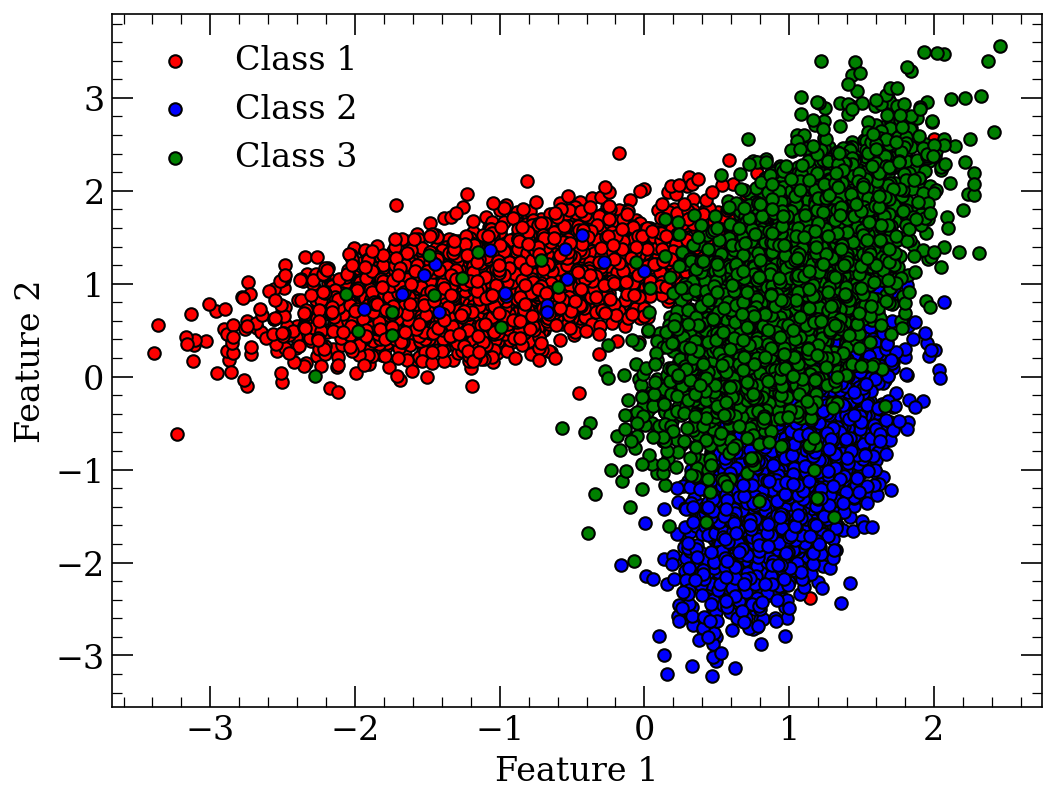

In [ ]:
plt.figure(figsize=(8, 6), dpi=150)
# plt.scatter(X['feature1'], X['feature2'], c=y, cmap='Paired', edgecolors='black')

# plot class 1
plt.scatter(X.loc[y == 0, 'feature1'], X.loc[y == 0, 'feature2'], c='red', label='Class 1', edgecolors='black')

# plot class 2
plt.scatter(X.loc[y == 1, 'feature1'], X.loc[y == 1, 'feature2'], c='blue', label='Class 2', edgecolors='black')

# plot class 3
plt.scatter(X.loc[y == 2, 'feature1'], X.loc[y == 2, 'feature2'], c='green', label='Class 3', edgecolors='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.minorticks_on()
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.legend(frameon=False)

plt.show()

## 2. Preprocessing the Data

Data preprocessing is a crucial step in any machine learning project. It involves cleaning and transforming the data to make it suitable for modeling. Proper data preprocessing helps improve the performance and accuracy of machine learning models.

### Steps in Data Preprocessing

1. **Checking for Missing Values**: Missing values can lead to incorrect or misleading results. It's essential to identify and handle them appropriately.
2. **Standardizing the Features**: Different features can have different scales. Standardizing (scaling) the features ensures that each feature contributes equally to the model's performance.

### 2.1 Checking for Missing Values

Missing values are common in real-world datasets. They can occur due to various reasons such as errors in data collection or transmission. Handling missing values is critical because many machine learning algorithms cannot handle them natively. There are several strategies to handle missing values:
- **Remove rows with missing values**: This is suitable when the dataset is large, and the number of missing values is relatively small.
- **Impute missing values**: Replace missing values with a specific value, such as the mean, median, or mode of the feature.

In our dataset, we will check if there are any missing values.


In [ ]:
# Check for missing values
missing_values = X.isnull().sum().sum()
print(f"Missing values in the dataset: {missing_values}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preprocessing complete.")


Missing values in the dataset: 0
Data preprocessing complete.


Thankfully there weren't any missing values, but this is rarely the case. Dealing with missing values is one of the fundamental problems in machine learning.

By standardizing the features, we ensure that all features contribute equally to the model's learning process. This step is crucial for improving the model's performance and making the training process more efficient.

## 3. Selecting a Machine Learning Model

Choosing the right machine learning model is crucial for the success of your project. Different models have different strengths and weaknesses, and some are better suited to specific types of data and tasks than others. Here are some commonly used machine learning models for classification tasks:

### 3.1 Logistic Regression

- **Description**: Logistic regression is a linear model used for binary classification tasks. It models the probability that a given input point belongs to a certain class.
- **When to Use**: Logistic regression works well when the relationship between the features and the target is approximately linear. It is simple to implement and interpret.
- **Pros**: Easy to understand, interpret, and implement. Performs well when the data is linearly separable.
- **Cons**: Limited to linear decision boundaries. Can be prone to overfitting if the number of features is much larger than the number of observations.

### 3.2 k-Nearest Neighbors (k-NN)

- **Description**: The k-NN algorithm classifies a data point based on the majority class among its k nearest neighbors in the feature space.
- **When to Use**: k-NN is a good choice for small datasets with a low number of dimensions. It is a non-parametric method, meaning it makes no assumptions about the underlying data distribution.
- **Pros**: Simple and intuitive. No training phase, which makes it fast for small datasets.
- **Cons**: Computationally expensive during prediction. Sensitive to the choice of k and the distance metric. Performance decreases with high-dimensional data.

### 3.3 Support Vector Machines (SVM)

- **Description**: SVMs find the hyperplane that best separates the classes in the feature space. They can handle both linear and non-linear classification tasks using kernel functions.
- **When to Use**: SVMs are effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples. They work well for both linear and non-linear classification tasks.
- **Pros**: Effective in high-dimensional spaces. Can handle non-linear decision boundaries using kernels.
- **Cons**: Memory-intensive. Can be slow to train on large datasets. The choice of kernel and regularization parameters is crucial for good performance.

### 3.4 Decision Trees

- **Description**: Decision trees partition the feature space into rectangles and assign a class label to each rectangle based on the majority class of the training points within it.
- **When to Use**: Decision trees are easy to interpret and visualize. They work well on both numerical and categorical data.
- **Pros**: Easy to understand and interpret. Can handle both numerical and categorical features.
- **Cons**: Prone to overfitting. Sensitive to small changes in the data.

### 3.5 Random Forests

- **Description**: Random forests are an ensemble method that combines multiple decision trees to improve performance and reduce overfitting. Each tree is trained on a bootstrap sample of the data and a random subset of features.
- **When to Use**: Random forests are a great default choice for many classification tasks. They handle high-dimensional data well and are robust to overfitting.
- **Pros**: High accuracy. Robust to overfitting. Can handle a large number of features.
- **Cons**: Can be computationally expensive. Less interpretable than a single decision tree.

### Why Random Forests are Usually a Safe Bet

Random forests are often a safe bet because they combine the strengths of multiple decision trees, leading to improved performance and robustness. They can handle a large number of features, are less likely to overfit, and provide a measure of feature importance, which can be useful for understanding the data.

For our example, we will use the Random Forest classifier, which is a powerful and versatile classification algorithm.

Let's initialize the Random Forest model.


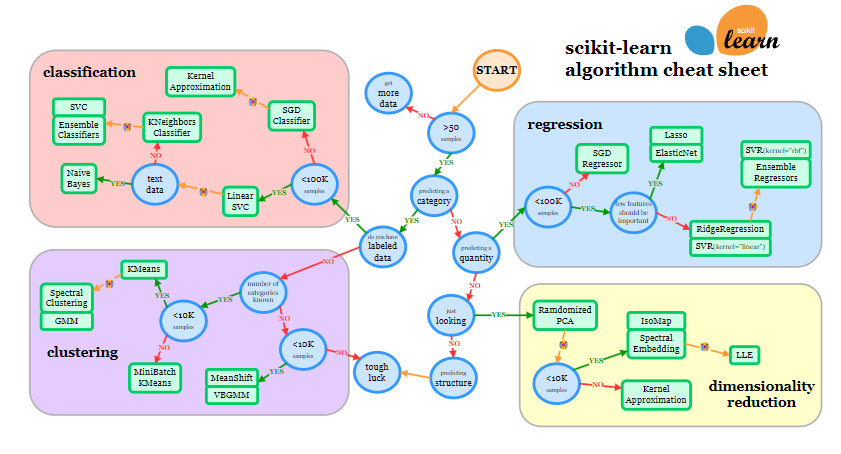

In [ ]:
# Initialize the model
model = RandomForestClassifier(random_state=42)


## 4. Splitting the Data into Training and Test Sets

We split the dataset into training and test sets to evaluate the model's performance on unseen data. Typically, 80% of the data is used for training and 20% for testing.

### Why Do We Split the Data?

When developing a machine learning model, it is essential to evaluate how well the model generalizes to new, unseen data. To do this, we divide our dataset into two parts:

1. **Training Set**: This subset of the data is used to train the model. The model learns the relationships between the features and the target variable from this data.
2. **Test Set**: This subset of the data is used to evaluate the model's performance. By using data that the model hasn't seen during training, we can get an unbiased estimate of how well the model will perform on new data.

If we do not split the data and use the same dataset for both training and testing, the model may perform exceptionally well on this data but fail to generalize to new data. This phenomenon is known as overfitting, where the model learns the noise in the training data instead of the underlying pattern.

Let's split our dataset.


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 8000
Test set size: 2000


## 5. Training the Model

Now we will train the Random Forest classifier on the training data.


In [ ]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


## 6. Evaluating the Model using a Confusion Matrix

Evaluating the performance of a machine learning model is crucial to understand how well it generalizes to new, unseen data. One common way to evaluate a classification model is by using a confusion matrix, along with various performance metrics.

### What is a Confusion Matrix?

A confusion matrix is a table that allows us to visualize the performance of a classification model. It shows the number of correct and incorrect predictions made by the model, broken down by each class. The confusion matrix consists of four main components for binary classification:

- **True Positives (TP)**: The number of correct positive predictions.
- **True Negatives (TN)**: The number of correct negative predictions.
- **False Positives (FP)**: The number of incorrect positive predictions (also known as Type I error).
- **False Negatives (FN)**: The number of incorrect negative predictions (also known as Type II error).

For multi-class classification, the confusion matrix is extended to show the counts of each class being classified correctly or incorrectly.

### How to Interpret the Confusion Matrix?

The confusion matrix provides a comprehensive view of how well the model is performing for each class. By looking at the matrix, we can identify which classes are being predicted correctly and which are being confused with others.

**In this case we normalized the values by rows so that the diagonal tells you the accuracy of classifying that class. This is the normal way that you will see confusion matrices. This is sometimes called the completeness matrix.**

### Additional Performance Metrics

To get a better understanding of the model's performance, we also calculate the following metrics:

- **Accuracy**: The ratio of correctly predicted instances to the total instances. It gives an overall measure of how often the model is correct.
  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision**: The ratio of correctly predicted positive instances to the total predicted positives. It indicates how many of the predicted positive instances are actually positive.
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall (Sensitivity)**: The ratio of correctly predicted positive instances to the total actual positives. It measures how well the model identifies positive instances.
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1 Score**: The harmonic mean of precision and recall. It provides a balance between precision and recall.
  $$
  \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

### Classification Report

The classification report provides a summary of precision, recall, and F1 score for each class, along with the overall accuracy. This report is useful for understanding the performance of the model across different classes.

### Implementing the Confusion Matrix and Performance Metrics

We will now compute and display the confusion matrix, along with the additional performance metrics, to evaluate our Random Forest classifier.


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       629
           1       0.95      0.93      0.94       674
           2       0.92      0.93      0.92       697

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



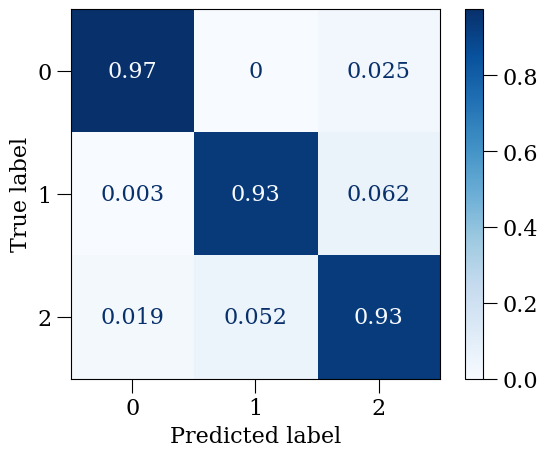

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Compute other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:")
print(class_report)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
#changes display color map to Blues
disp.plot(cmap=plt.cm.Blues)


## 7. Improving the Model using GridSearchCV for Hyperparameter Tuning

### What are Hyperparameters?

In machine learning, hyperparameters are the parameters that are set before the learning process begins. They are different from model parameters, which are learned during training. Examples of hyperparameters include the number of trees in a Random Forest, the learning rate in a neural network, or the regularization strength in logistic regression.

Hyperparameters can significantly impact the performance of a machine learning model. Therefore, selecting the best hyperparameters is crucial for building an optimal model. This process is known as hyperparameter tuning.

### Why Tune Hyperparameters?

Different hyperparameters can lead to different model performances. By tuning hyperparameters, we aim to find the combination that yields the best performance for our specific task. This is usually done by defining a set of possible values for each hyperparameter and searching through this space to find the best combination.

### How to Tune Hyperparameters?

One common method for hyperparameter tuning is GridSearchCV, which performs an exhaustive search over a specified parameter grid. It trains and evaluates the model for each combination of hyperparameters using cross-validation and selects the combination that performs the best.

We will use GridSearchCV to tune the `n_estimators` (number of trees in the forest) and `max_depth` (maximum depth of the tree) parameters of the Random Forest classifier.

Let's define the parameter grid and perform the grid search.


Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Tuned Model Accuracy: 0.95


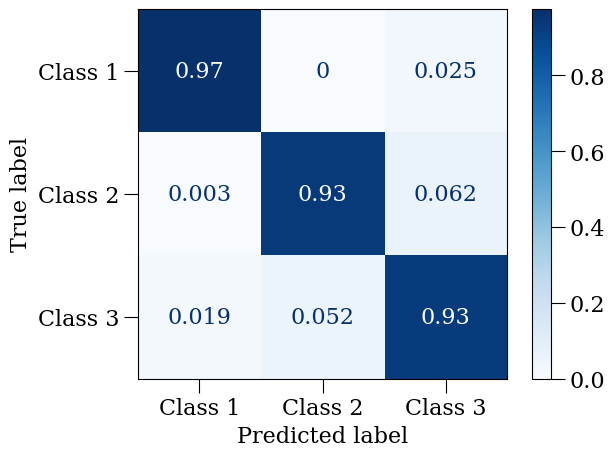

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best:.2f}")

# Compute confusion matrix for tuned model
conf_matrix_best = confusion_matrix(y_test, y_pred_best, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Class 1', 'Class 2', 'Class 3'])
#changes display color map to Blues
disp.plot(cmap=plt.cm.Blues)

In this case there wasn't really an inprovement in the accuracy, likely due to the easy to classify nature of our data. But it will often be the case that tuning hyper parameters leads to a substantial increase in accuracy!

## Challenge: Classification on the Titanic Dataset

Now that you have gone through the complete workflow of a machine learning project using the Wine Quality dataset, it's time to apply what you've learned to a new dataset. The Titanic dataset is a classic dataset used for classification tasks. Your goal is to predict whether a passenger survived or not based on various features such as age, sex, passenger class, and others.

### Steps for the Challenge

1. **Load the Titanic Dataset**: You can load the dataset directly from seaborn or any other source you prefer.
2. **Preprocess the Data**: Handle missing values, encode categorical features, and standardize numerical features.
3. **Select a Model**: Choose a classification model. You can use Random Forests, Logistic Regression, SVM, or any other model of your choice.
4. **Split the Data**: Split the dataset into training and test sets.
5. **Train the Model**: Train your chosen model on the training data.
6. **Evaluate the Model**: Use a confusion matrix and other performance metrics to evaluate the model on the test data.
7. **Tune Hyperparameters**: Use GridSearchCV to find the best hyperparameters for your model **(optional)**.

### Additional Tips

- **Feature Engineering**: Consider creating new features from the existing ones to improve model performance. For example, you can create a feature that indicates whether a passenger was traveling alone or with family.
- **Handling Imbalanced Data**: If the dataset is imbalanced (i.e., the classes are not represented equally), consider using techniques such as resampling or class weights to address this issue. Remember that machine learning algorithms encode the bias of their training sets. This means that if you have more of one class than another, it will be inherently biased towards the majority class.
- **Cross-Validation**: Use cross-validation to get a better estimate of your model's performance.

### Getting Started

Below is some starter code to help you load and preprocess the Titanic dataset. Good luck, and have fun!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import fetch_openml
np.random.seed(42)

# Load dataset
X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
X

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
# Missing values
missing_values = X.isnull().sum().sum()
print(f"Missing values in the dataset: {missing_values}")
X.isnull().sum()

Missing values in the dataset: 3855


,0
pclass,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014
embarked,2


In [ ]:
X.drop(columns=['age','sibsp','cabin','boat','body','home.dest'],axis=1)

,pclass,name,sex,parch,ticket,fare,embarked
0,1.0,"Allen, Miss. Elisabeth Walton",female,0.0,24160,211.3375,S
1,1.0,"Allison, Master. Hudson Trevor",male,2.0,113781,151.5500,S
2,1.0,"Allison, Miss. Helen Loraine",female,2.0,113781,151.5500,S
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,2.0,113781,151.5500,S
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,2.0,113781,151.5500,S
...,...,...,...,...,...,...,...
1304,3.0,"Zabour, Miss. Hileni",female,0.0,2665,14.4542,C
1305,3.0,"Zabour, Miss. Thamine",female,0.0,2665,14.4542,C
1306,3.0,"Zakarian, Mr. Mapriededer",male,0.0,2656,7.2250,C
1307,3.0,"Zakarian, Mr. Ortin",male,0.0,2670,7.2250,C


Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       144
           1       0.96      0.92      0.94       118

    accuracy                           0.95       262
   macro avg       0.95      0.95      0.95       262
weighted avg       0.95      0.95      0.95       262



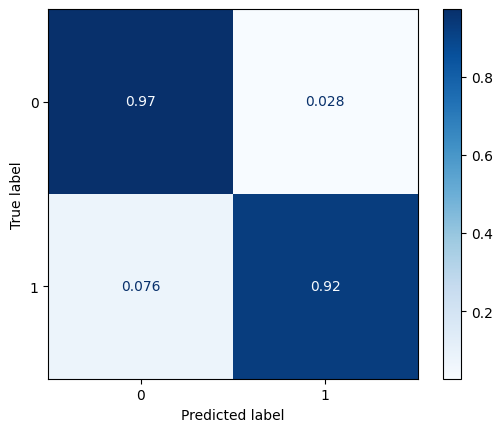

In [ ]:
# Standardization
X_new = pd.get_dummies(X)
X_new = X_new.fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Model
model = DecisionTreeClassifier(random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
cm = confusion_matrix(y_test, y_pred, normalize='true')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:")
print(class_report)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
#changes display color map to Blues
disp.plot(cmap=plt.cm.Blues)

Best Parameters: {'max_depth': None, 'max_features': 200}
Tuned Model Accuracy: 0.87


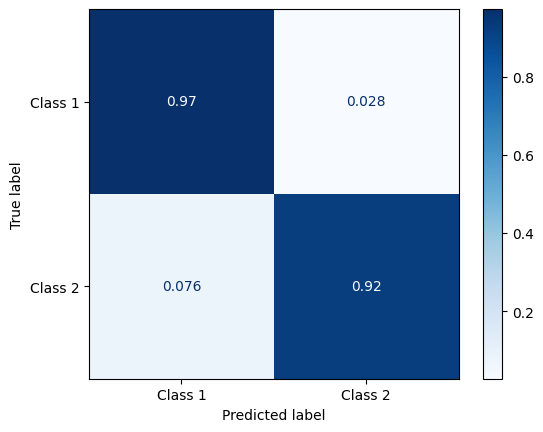

In [ ]:
# Tune Hyperparameters
param_grid = {
    'max_features': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Tuned Model Accuracy: {accuracy_best:.2f}")

# confusion matrix for tuned model
conf_matrix_best = confusion_matrix(y_test, y_pred_best, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Class 1', 'Class 2'])
#changes display color map to Blues
disp.plot(cmap=plt.cm.Blues)

In [ ]:
model.predict(X_test)

array(['0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1',
       '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0',
       '0', '1', '1', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1',
       '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0',
       '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '1', '1',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1',
       '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1',
       '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0',
       '0', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1',
       '1', '0', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1',
       '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0',
       '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1